# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/dlcourse2018_students

Fall Semester 2018

In [33]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Solutions to exercises

## Exercise 1 (Difficulty: easy)

Draw and develop in tensorflow with ```tf.constant``` the computational graphs for the following operations

A) ```w1*x1+w2*x2+x1*x1```

B) ```A*x1+3+x2/2```

Use as input values ```x1 = 5``` and ```x2 = 6```

## A)

There are several ways of solving this exercise. This is one possible

In [3]:
# Building Phase
x1 = tf.constant(5.)
x2 = tf.constant(6.)

w1 = 10.
w2 = 20.

In [5]:
z1 = tf.multiply(w1, x1)
z2 = tf.multiply(w2, x2)
z3 = tf.multiply(x1, x1)

result = z1 + z2 + z3

In [8]:
# Evaluation Phase
with tf.Session() as sess:
    print(result.eval())

195.0


A second way of doing that is the following

In [9]:
# Building Phase
x1 = tf.constant(5.)
x2 = tf.constant(6.)

w1 = 10.
w2 = 20.

In [10]:
z1 = tf.multiply(w1, x1)
z2 = tf.multiply(w2, x2)
z3 = tf.multiply(x1, x1)

result = z1 + z2 + z3

In [12]:
# Evaluation Phase
sess = tf.Session()
print(sess.run(result))
sess.close()

195.0


But you can also define ```w1``` and ```w2``` as constants too

In [13]:
# Building Phase
x1 = tf.constant(5.)
x2 = tf.constant(6.)

w1 = tf.constant(10.)
w2 = tf.constant(20.)

In [14]:
z1 = tf.multiply(w1, x1)
z2 = tf.multiply(w2, x2)
z3 = tf.multiply(x1, x1)

result = z1 + z2 + z3

In [15]:
# Evaluation Phase
sess = tf.Session()
print(sess.run(result))
sess.close()

195.0


### B)

In [17]:
# Building Phase
x1 = tf.constant(5.)
x2 = tf.constant(6.)
A = tf.constant(10.)

In [19]:
result = tf.multiply(A, x1) + tf.constant(3.) + tf.divide(x2, 2.)

In [20]:
# Evaluation Phase
sess = tf.Session()
print(sess.run(result))
sess.close()

56.0


or you can define the ```result``` in multiple steps

In [21]:
# Building Phase
z1 = tf.multiply(A, x1)
z2 = tf.add(z1, 3.)
z3 = tf.add(z2, tf.divide(x2,2.))

In [22]:
# Evaluation Phase
sess = tf.Session()
print(sess.run(result))
sess.close()

56.0


## Exercise 2 (Difficulty: medium)

Draw and develop in tensorflow with ```tf.Variable``` the computational graph for the following operation ```A*(w1*x1+w2*x2)```

build the computational graph and then evaluate it two times (without re-building it) with the initial values in the same session

A) ```x1 = 3, x2 = 4```

B) ```x1 = 5, x2 = 7```

In [24]:
# Building Phase
x1 = tf.Variable(3.)
x2 = tf.Variable(4.)
w1 = tf.constant(10.)
w2 = tf.constant(20.)
A = tf.constant(30.)
init = tf.global_variables_initializer()

z1 = tf.multiply(w1,x1)
z2 = tf.multiply(w2,x2)
z3 = tf.add(z1, z2)
result = tf.multiply(A, z3)

To run the same graph twice in the same session you can do the following

In [29]:
sess = tf.Session()
print(sess.run(result, feed_dict = {x1: 3, x2: 4}))
print(sess.run(result, feed_dict = {x1: 5, x2: 7}))
sess.close()

3300.0
5700.0


Or you can write a function that creates a session, evaluates a node, and then close it.

In [25]:
def run_evaluation(x1_, x2_):
    sess = tf.Session()
    print(sess.run(result, feed_dict = {x1: x1_, x2: x2_}))
    sess.close()

And then you can evalute the node with a call to your function.

In [26]:
run_evaluation(3,4)

3300.0


In [27]:
run_evaluation(5,7)

5700.0


## Exercise 3 (Difficulty: FUN)

Consider two vectors

``` x1 = [1,2,3,4,5],  x2 = [6,7,8,9,10]```

draw and build in tensorflow the computational graph for the dot-product operation between the two vectors. If you don't know what a dot-product is you can check it here (we covered that in our introductory week) [](https://en.wikipedia.org/wiki/Dot_product).

Build it in two different ways:

A) Do it with loops. Build a computational graph that takes as input scalars and in the session/evaluation phase build a loop to go over all the inputs and then sums the results

B) Do it in one shot with tensorflow. Build a computational graph that takes as input vectors and do the entire operation directly in tensorflow. 

Hint: you can use in tensorflow two methods: ```tf.reduce_sum(tf.multiply(x1, x2))``` or ```tf.matmul(tf.reshape(x1,[1,5]), tf.reshape(x2, [-1, 1]))```. Try to understand why they work checking the official documentation.

## a)

In [30]:
first = tf.Variable(0.)
second = tf.Variable(0.)
mult = tf.multiply(first, second)

In [33]:
x1 = [1,2,3,4,5]
x2 = [6,7,8,9,10]

sess = tf.Session()
total = 0
for i in range(0,len(x1)):
    total = total + sess.run(mult, feed_dict = {first: x1[i], second: x2[i]})
    
print(total)

130.0


Note that you can do that easily in numpy

In [34]:
np.dot(x1, x2)

130

## b)

Another way, and much more efficient, is the following

In [39]:
x1 = tf.placeholder(tf.int32, None) # Let's assume we work with integers
x2 = tf.placeholder(tf.int32, None) # Let's assume we work with integers
result = tf.reduce_sum(tf.multiply(x1, x2))

In [41]:
sess = tf.Session()
print(sess.run(result, feed_dict = {x1: [1,2,3,4,5], x2:[6,7,8,9,10]}))
sess.close()

130


Or in with matrices

In [46]:
x1 = tf.placeholder(tf.int32, None) # Let's assume we work with integers
x2 = tf.placeholder(tf.int32, None) # Let's assume we work with integers
result = tf.matmul(tf.reshape(x1,[1,5]), tf.reshape(x2, [-1, 1]))

In [47]:
sess = tf.Session()
print(sess.run(result, feed_dict = {x1: [1,2,3,4,5], x2:[6,7,8,9,10]}))
sess.close()

[[130]]


Note that the result is different in the two cases! In the first we get a scalar, in the second a matrix that has dimensions ```1x1```, because the second method is a matrix multiplication function that will return a matrix (or better a tensor).

## c) (even another way) (BONUS Solution)

There is actually another way. Tensorflow can perform the dot product directly

In [50]:
x1 = tf.placeholder(tf.int32, None) # Let's assume we work with integers
x2 = tf.placeholder(tf.int32, None) # Let's assume we work with integers
result = tf.tensordot(x1, x2, axes = 1)

In [51]:
sess = tf.Session()
print(sess.run(result, feed_dict = {x1: [1,2,3,4,5], x2:[6,7,8,9,10]}))
sess.close()

130


## Exercise 4 (Difficulty: medium)

Write a function that build a computational graph for the operation ```x1+x2``` where the input ```x1``` and ```x2``` are input with given dimensions. Your ```x1``` and ```x2``` should be declared as ```tf.placeholder```. 
Your functions should accept as input:

- dimensions of ```x1``` as list, for example ```[3]```
- dimensions of ```x2``` as list, for example ```[3]```

The function should return a tensor ```z = x1 + x2```. 
Then open a session and evaluate ```z``` with the following inputs:

- ```x1 = [4,6,7], x2 = [1,2,9]```
- ```x1 = [1,2,....., 1000], x2 = [10001, 10002, ...., 11000]```

and print the result.

In [69]:
def build_graph(dim1, dim2):
    tf.reset_default_graph()
    x1 = tf.placeholder(tf.float32, dim1)
    x2 = tf.placeholder(tf.float32, dim2)
    z = tf.add(x1, x2)
    return z, x1, x2

In [80]:
x1list = [4,6,7]
x2list = [1,2,9]


# Building Phase
z, x1, x2 =  build_graph(len(x1list), len(x2list))

sess = tf.Session()
print(sess.run(z, feed_dict = {x1: x1list, x2: x2list}))
sess.close()

[ 5.  8. 16.]


**Note that since you refer to the tensors ```x1``` and ```x2``` in the ```feed_dict``` dictionary you need to have the tensors visible, otherwise you will get an error, therefore you need your function to return no only ```z``` but also ```x1``` and ```x2```.**

In [77]:
x1list = np.arange(1, 1001, 1)
x2list = np.arange(10001, 11001, 1)

# Building Phase
z, x1, x2 = build_graph(len(x1list), len(x2list))

sess = tf.Session()
print(sess.run(z, feed_dict = {x1: x1list, x2: x2list}))
sess.close()

[10002. 10004. 10006. 10008. 10010. 10012. 10014. 10016. 10018. 10020.
 10022. 10024. 10026. 10028. 10030. 10032. 10034. 10036. 10038. 10040.
 10042. 10044. 10046. 10048. 10050. 10052. 10054. 10056. 10058. 10060.
 10062. 10064. 10066. 10068. 10070. 10072. 10074. 10076. 10078. 10080.
 10082. 10084. 10086. 10088. 10090. 10092. 10094. 10096. 10098. 10100.
 10102. 10104. 10106. 10108. 10110. 10112. 10114. 10116. 10118. 10120.
 10122. 10124. 10126. 10128. 10130. 10132. 10134. 10136. 10138. 10140.
 10142. 10144. 10146. 10148. 10150. 10152. 10154. 10156. 10158. 10160.
 10162. 10164. 10166. 10168. 10170. 10172. 10174. 10176. 10178. 10180.
 10182. 10184. 10186. 10188. 10190. 10192. 10194. 10196. 10198. 10200.
 10202. 10204. 10206. 10208. 10210. 10212. 10214. 10216. 10218. 10220.
 10222. 10224. 10226. 10228. 10230. 10232. 10234. 10236. 10238. 10240.
 10242. 10244. 10246. 10248. 10250. 10252. 10254. 10256. 10258. 10260.
 10262. 10264. 10266. 10268. 10270. 10272. 10274. 10276. 10278. 10280.
 10282

## Exercise 5 (Difficult: FUN)

### Linear Regression with tensorflow

https://onlinecourses.science.psu.edu/stat501/node/382/

Consider the following dataset

In [10]:
x = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0]
y = [33, 42, 45, 51, 53, 61, 62]

We want to find the best parameters $p_0$ and $p_1$ that minimise the MSE (mean squared error) for the data given, in other words we want to do a linear regression on the data $(x,y)$. Given that a matrix solution to find the best parameter is

$$
{\bf p} =(X^TX)^{-1} X^T Y
$$

where $X^T$ is the transpose of the matrix $X$. The matrix $X$ is defined as

$$
X = 
\begin{bmatrix}
1 & x_1  \\
... &  ...  \\
1 &  x_n 
\end{bmatrix}
$$

The matrix $Y$ is simply a matrix $n\times 1$ containing the values $y_i$.

dimensions are:

- $X$ has dimensions $n\times 2$
- $Y$ has dimensions $n\times 1$
- ${\bf p}$ has dimensions $2\times 1$

Build a computational graph that evaluates $\bf p$ as given above, given the matrices $X$ and $Y$. Note you will have to build the matrices from the data given at the beginning. If you need more information a beatifully long explanation can be found here https://onlinecourses.science.psu.edu/stat501/node/382/

Let's convert ```y``` to a floating list... **Remeber tensorflow is really strict with datatypes**.

In [11]:
y = [float(i) for i in y]
y

[33.0, 42.0, 45.0, 51.0, 53.0, 61.0, 62.0]

In [12]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [13]:
x['b'] = 1
x.head()

,0,b
0,4.0,1
1,4.5,1
2,5.0,1
3,5.5,1
4,6.0,1


In [14]:
cols = x.columns.tolist()
cols = cols[-1:] + cols[:-1]
print(cols)

['b', 0]


In [15]:
x = x[cols]

In [16]:
x.head()

,b,0
0,1,4.0
1,1,4.5
2,1,5.0
3,1,5.5
4,1,6.0


Let's build the computational graph: 

**NOTE: if you use tf.float32 you will get results that are slightly different than numpy. So be aware. To be safe you can use ```float64```.**

Always try to be as specific 
as you can with dimensions
The first dimensions is defined as "None" so that we use, in necessary, 
with different number of observations without rebuilding the graph.

In [ ]:
tf.reset_default_graph()
xinput = tf.placeholder(tf.float64, [None,2])
yinput = tf.placeholder(tf.float64, [None,1]) 

Multiplication between tensors is somewhat complicated, especially when dealing
with tensors with more dimensions. So we use the method

https://www.tensorflow.org/api_docs/python/tf/einsum

check it out to get more information.

In [51]:
tmp = tf.einsum('ij,jk->ik',tf.transpose(xinput) , xinput)
part1 = tf.linalg.inv(tmp)
part2 = tf.einsum('ij,jk->ik',tf.transpose(xinput), yinput)


pout = tf.einsum('ij,jk->ik', part1, part2)
# Reference: https://www.tensorflow.org/api_docs/python/tf/einsum

In [56]:
sess = tf.Session()
print("The best parameters p are:")
print(sess.run(pout, feed_dict = {xinput: x, yinput: y}))
sess.close()

The best parameters p are:
[[-2.67857143]
 [ 9.5       ]]


If you remember the first week (check https://github.com/michelucci/dlcourse2018_students/blob/master/Week%201%20-%20Mathematic%20introduction/Week%201%20-%20Solution%20to%20exercises.ipynb) you can do the same with ```numpy```

In [57]:
part1np = np.linalg.inv(np.matmul(x.transpose() , x))
part2np = np.matmul(x.transpose(), y)

pnp = np.matmul(part1np, part2np)

In [58]:
print(pnp)

[[-2.67857143]
 [ 9.5       ]]


## Computational Graph for predictions

The same result we got with tensorflow. Now we can build a graph that will use the ```p``` we have found for predictions

In [59]:
p = tf.placeholder(tf.float32, [2,1])
xnode = tf.placeholder(tf.float32, [None, 2]) # This time let's be specific with dimensions

pred = tf.tensordot(xnode, p, axes = 1)

In [60]:
sess = tf.Session()
pred_y = sess.run(pred, feed_dict = {p: pnp, xnode: x})

In [61]:
pred_y

array([[35.32143],
       [40.07143],
       [44.82143],
       [49.57143],
       [54.32143],
       [59.07143],
       [63.82143]], dtype=float32)

And those are the **true** values

In [62]:
y

,0
0,33.0
1,42.0
2,45.0
3,51.0
4,53.0
5,61.0
6,62.0


## Plot of the results

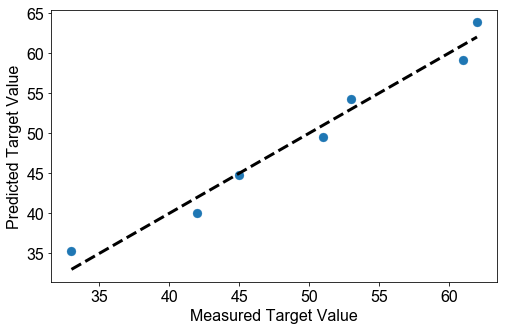

In [50]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y, pred_y, lw = 0.3, s = 80)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 3)
ax.set_xlabel('Measured Target Value', fontsize = 16);
ax.set_ylabel('Predicted Target Value', fontsize = 16);

plt.tick_params(labelsize=16)